## Geometric Mean, Dominance, Index of Imbalanced Accuracy

- **G-Mean** = sqrt( tp / (tp = fn) * tn / (tn + fp) ) = sqrt ( recall x True Negative Rate)

- **Dominance** = True Positive Rate - True Negative Rate

- **IBA** = M * (1 + alpha * Dominance)

- **TPR** = **Recall** = tp / (tp + fn)

- **TNR** = tn / (tn + fp)


All of these metrics depend on the discrimination threshold used to classify an observation as member of the minority or positive class.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import (
    recall_score,
    accuracy_score,
    balanced_accuracy_score,
)

from imblearn.metrics import (
    geometric_mean_score,
    make_index_balanced_accuracy,
)

## Load data

In [2]:
# load data
data = pd.read_csv('../kdd2004.csv')

# remap target class to 0 and 1
data['target'] = data['target'].map({-1:0, 1:1})

data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
0,52.0,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76,0
1,58.0,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73,0
2,77.0,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,...,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24,0
3,41.0,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,...,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73,0
4,50.0,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,...,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23,0


In [3]:
# data size

data.shape

(145751, 75)

In [4]:
# imbalanced target

data.target.value_counts() / len(data)

0    0.991108
1    0.008892
Name: target, dtype: float64

In [5]:
# separate dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),  # drop the target
    data['target'],  # just the target
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((102025, 74), (43726, 74))

## Baseline: predict the majority class

In [6]:
# Baseline prediction: predict the majority class

y_train_base = pd.Series(np.zeros(len(y_train)))
y_test_base = pd.Series(np.zeros(len(y_test)))

## Train ML models

### Random Forests

In [10]:
rf = RandomForestClassifier(n_estimators=300, random_state=39, max_depth=2, n_jobs=4)

rf.fit(X_train, y_train)

y_train_rf = rf.predict_proba(X_train)[:,1]
y_test_rf = rf.predict_proba(X_test)[:,1]

### Logistic Regression

In [11]:
logit = LogisticRegression(random_state=0,  max_iter=1000)

logit.fit(X_train, y_train)

y_train_logit = logit.predict_proba(X_train)[:,1]
y_test_logit = logit.predict_proba(X_test)[:,1]

/home/bk/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Recall

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

- **TPR** = **Recall** = tp / (tp + fn)

In [12]:
print('Recall Baseline test: ', recall_score(y_test, y_test_base, pos_label=1))
print('Recall Random Forest test:', recall_score(y_test, rf.predict(X_test), pos_label=1))
print('Recall Logistic Regression test:', recall_score(y_test, logit.predict(X_test), pos_label=1))

Recall Baseline test:  0.0
Recall Random Forest test: 0.5950617283950618
Recall Logistic Regression test: 0.7061728395061728


## True Negative Rate

Equivalent of Recall, but for the majority class.

- **TNR** = tn / (tn + fp)

In [13]:
print('TNR Baseline test: ', recall_score(y_test, y_test_base, pos_label=0))
print('TNR Random Forest test:', recall_score(y_test, rf.predict(X_test), pos_label=0))
print('TNR Logistic Regression test:', recall_score(y_test, logit.predict(X_test), pos_label=0))

TNR Baseline test:  1.0
TNR Random Forest test: 0.9999769165070058
TNR Logistic Regression test: 0.9996537476050876


## Geometric Mean

https://imbalanced-learn.org/stable/generated/imblearn.metrics.geometric_mean_score.html

- **G-Mean** = sqrt( tp / (tp = fn) * tn / (tn + fp) ) = sqrt ( recall x True Negative Rate)

In [14]:
print('G-Mean Baseline test: ', geometric_mean_score(y_test, y_test_base))
print('G-Mean Random Forest test:', geometric_mean_score(y_test, rf.predict(X_test)))
print('G-Mean Logistic Regression test:', geometric_mean_score(y_test, logit.predict(X_test)))

G-Mean Baseline test:  0.0
G-Mean Random Forest test: 0.7713935391820593
G-Mean Logistic Regression test: 0.8401954090979501


## Dominance

- **Dominance** = True Positive Rate - True Negative Rate

In [15]:
def dominance(y_true, y_pred):
    tpr = recall_score(y_test, y_pred, pos_label=1)
    tnr = recall_score(y_test, y_pred, pos_label=0)
    return tpr - tnr

In [16]:
print('Dominance Baseline test: ', dominance(y_test, y_test_base))
print('Dominance Random Forest test:', dominance(y_test, rf.predict(X_test)))
print('Dominance Logistic Regression test:', dominance(y_test, logit.predict(X_test)))

Dominance Baseline test:  -1.0
Dominance Random Forest test: -0.40491518811194405
Dominance Logistic Regression test: -0.2934809080989148


## Metrics vs threshold

Text(0.5, 1.0, 'Metrics vs Discriminant Threshold')

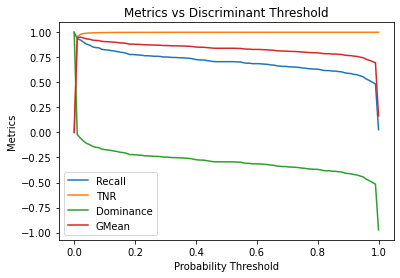

In [17]:
# list of thresholds
thresholds = np.linspace(0, 1, 100)

# list co collect values
recall_ls = []
tnr_ls = []
dominance_ls = []
gmean_ls = []

# obtain probabilities
probs_logit = logit.predict_proba(X_test)[:, 1]

# calculate G-Mean based on thresholds
for threshold in thresholds:

    # obtain class prediction based on threshold
    preds_logit = np.where(probs_logit >= threshold, 1, 0)

    # obtain metrics
    recall_ls.append(recall_score(y_test, preds_logit, pos_label=1))
    tnr_ls.append((recall_score(y_test, preds_logit, pos_label=0)))
    dominance_ls.append(dominance(y_test, preds_logit))
    gmean_ls.append(geometric_mean_score(y_test, preds_logit))


# after loop concatenate metrics
metrics = pd.concat([
    pd.Series(recall_ls),
    pd.Series(tnr_ls),
    pd.Series(dominance_ls),
    pd.Series(gmean_ls)], axis=1)

# add column names and thresholds in index
metrics.columns = ['Recall', 'TNR', 'Dominance', 'GMean']
metrics.index = thresholds

# plot
metrics.plot()
plt.xlabel('Probability Threshold')
plt.ylabel('Metrics')
plt.title('Metrics vs Discriminant Threshold')

## Index of imbalanced accuracy

### Geometric Mean

In [18]:
print('G-Mean Baseline test: ', geometric_mean_score(y_test, y_test_base))
print('G-Mean Random Forest test:', geometric_mean_score(y_test, rf.predict(X_test)))
print('G-Mean Logistic Regression test:', geometric_mean_score(y_test, logit.predict(X_test)))

G-Mean Baseline test:  0.0
G-Mean Random Forest test: 0.7713935391820593
G-Mean Logistic Regression test: 0.8401954090979501


In [19]:
gmean = make_index_balanced_accuracy(alpha=0.5, squared=True)(geometric_mean_score)

print('Corrected G-Mean Baseline test: ', gmean(y_test, y_test_base))
print('Corrected G-Mean Random Forest test:', gmean(y_test, rf.predict(X_test)))
print('Corrected G-Mean Logistic Regression test:', gmean(y_test, logit.predict(X_test)))

Corrected G-Mean Baseline test:  0.0
Corrected G-Mean Random Forest test: 0.5950479922918233
Corrected G-Mean Logistic Regression test: 0.7059283254692718


### Accuracy

In [20]:
print('Accuracy Baseline test: ', accuracy_score(y_test, y_test_base))
print('Accuracy Random Forest test:', accuracy_score(y_test, rf.predict(X_test)))
print('Accuracy Logistic Regression test:', accuracy_score(y_test, logit.predict(X_test)))

Accuracy Baseline test:  0.9907377761514888
Accuracy Random Forest test: 0.996226501395051
Accuracy Logistic Regression test: 0.9969354617390112


In [21]:
acc = make_index_balanced_accuracy(alpha=0.5, squared=True)(accuracy_score)

print('Corrected Accuracy Baseline test: ', acc(y_test, y_test_base))
print('Corrected Accuracy Random Forest test:', acc(y_test, rf.predict(X_test)))
print('Corrected Accuracy Logistic Regression test:', acc(y_test, logit.predict(X_test)))

Corrected Accuracy Baseline test:  0.4907806705467988
Corrected Accuracy Random Forest test: 0.7915347120705715
Corrected Accuracy Logistic Regression test: 0.8480378661975266


## Balanced Accuracy

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html

In [22]:
print('Corrected Accuracy Baseline test: ', balanced_accuracy_score(y_test, y_test_base))
print('Corrected Accuracy Random Forest test:', balanced_accuracy_score(y_test, rf.predict(X_test)))
print('Corrected Accuracy Logistic Regression test:', balanced_accuracy_score(y_test, logit.predict(X_test)))

Corrected Accuracy Baseline test:  0.5
Corrected Accuracy Random Forest test: 0.7975193224510337
Corrected Accuracy Logistic Regression test: 0.8529132935556303
